## Emotion Detection Model 
### Training and Testing

In [11]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# The Sequential API is a way to create models sequence by sequence
# The to_categorical() function is used to one-hot encode the labels
# The load_img() function is used to load an image
# The LabelEncoder() is used to encode the labels
# The Dense(), Conv2D(), Dropout(), Flatten(), MaxPooling2D() are layers used in the model


In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'


In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels




In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [10]:
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, color_mode="grayscale")  # Updated line
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [11]:
train_features = extract_features(train['image'])

In [12]:
test_features = extract_features(test['image'])

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [20]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (28821, 48, 48, 1)
y_train shape: (28821, 7)
x_test shape: (7066, 48, 48, 1)
y_test shape: (7066, 7)


In [23]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.2394 - loss: 1.8233 - val_accuracy: 0.2605 - val_loss: 1.7978
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.2625 - loss: 1.7878 - val_accuracy: 0.3092 - val_loss: 1.6793
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 190s 842ms/step - accuracy: 0.3156 - loss: 1.6799 - val_accuracy: 0.4176 - val_loss: 1.5125
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 201s 889ms/step - accuracy: 0.3827 - loss: 1.5676 - val_accuracy: 0.4599 - val_loss: 1.4069
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 177s 783ms/step - accuracy: 0.4269 - loss: 1.4758 - val_accuracy: 0.4928 - val_loss: 1.3247
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 191s 847ms/step - accuracy: 0.4530 - loss: 1.4145 - val_accuracy: 0.4987 - val_loss: 1.2963
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 198s 875ms/step - accuracy: 0.4724 - loss: 1.3808 - val_accuracy: 0.5117 - val_loss: 1.2755
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 196s 869ms/step - accuracy: 0.4793

### Saving the model

In [24]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

### Testing the model 

In [8]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import random

In [3]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [4]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [5]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [15]:
# Folder containing test images
test_folder = "images/test"

# Get list of all image files in the test folder and subfolders
image_files = []
for root, dirs, files in os.walk(test_folder):
    for file in files:
        if file.endswith(('.jpg', '.png')):
            image_files.append(os.path.join(root, file))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Image: images/test\disgust\19734.jpg
Actual Expression: disgust
Predicted Expression: disgust
Model Accuracy: 97.34%


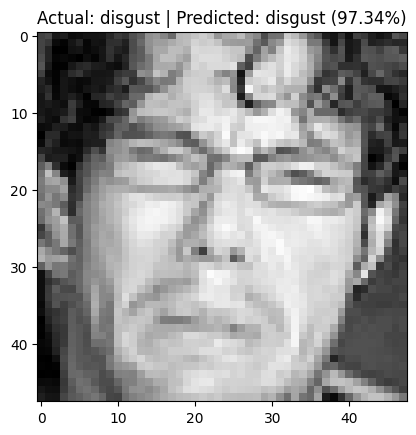

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image: images/test\fear\25046.jpg
Actual Expression: fear
Predicted Expression: fear
Model Accuracy: 78.86%


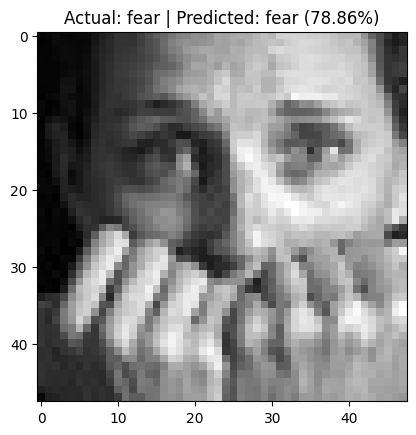

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: images/test\happy\2058.jpg
Actual Expression: happy
Predicted Expression: happy
Model Accuracy: 93.27%


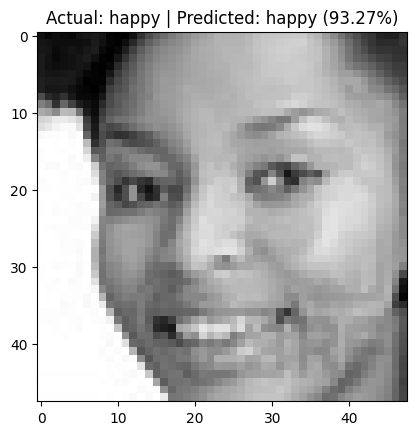

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Image: images/test\neutral\1835.jpg
Actual Expression: neutral
Predicted Expression: neutral
Model Accuracy: 78.11%


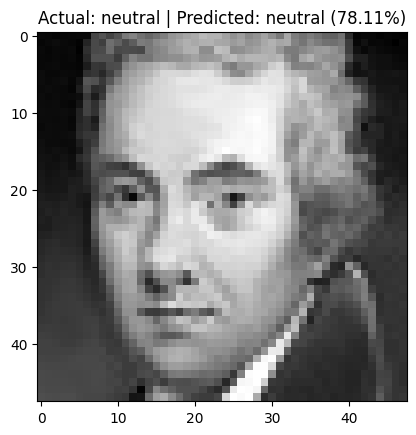

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Image: images/test\happy\34295.jpg
Actual Expression: happy
Predicted Expression: happy
Model Accuracy: 92.79%


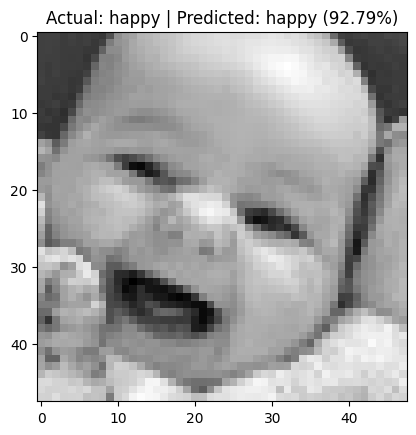

Exiting the program.


In [18]:
# Check if there are valid image files in the folder
if not image_files:
    print(f"No images found in the folder or its subfolders: {test_folder}")
    exit()

# Main loop to test multiple images randomly
while True:
    # Randomly select an image from the test folder or its subfolders
    image_path = random.choice(image_files)

    try:
        # Extract actual expression from the folder name
        actual_expression = os.path.basename(os.path.dirname(image_path))

        # Preprocess and predict the label
        img = ef(image_path)
        pred = model.predict(img)
        pred_label = label[pred.argmax()]
        confidence = np.max(pred) * 100  # Confidence percentage for the prediction

        # Display the actual vs predicted output
        print(f"Image: {image_path}")
        print(f"Actual Expression: {actual_expression}")
        print(f"Predicted Expression: {pred_label}")
        print(f"Model Accuracy: {confidence:.2f}%")

        # Display the image and prediction using matplotlib
        plt.imshow(img.reshape(48, 48), cmap='gray')
        plt.title(f"Actual: {actual_expression} | Predicted: {pred_label} ({confidence:.2f}%)")
        plt.show()

        # Ask the user if they want to continue or quit
        cont = input("Press Enter to test another image or type 'q' to quit: ")
        if cont.lower() == 'q':
            print("Exiting the program.")
            break

    except Exception as e:
        print(f"Error: {e}")